In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score

# **Etape 1 : Collecte et préparation de données**

## **Chargement du dataset**

In [89]:
df_path = "données_brute.csv"
df = pd.read_csv(df_path, delimiter=',')

In [90]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## **Nettoyage de données**

**Vérification des doublons**

In [92]:
df.duplicated().sum()

0

In [93]:
df.drop_duplicates(inplace=True)

**Gestion des valeurs manquantes**

In [94]:
# Tableau des valeurs manquantes par colonne
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [95]:
# Remplacement des valeurs manquantes du Revenu Mensuel par la médiane
df.loc[:, 'Income'] = df['Income'].fillna(df['Income'].median())

In [96]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


## **Ajout de colonnes**

In [97]:
# Ajout du calcul de l'âge
annee_actuelle = 2024
df['Age'] = annee_actuelle - df['Year_Birth']

In [98]:
# Ajout du calcul du montant total dépensé
df['DépenseTotale'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [99]:
# Ajout du calcul de l'ancienneté
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Anciennete'] = (pd.Timestamp.today() - df['Dt_Customer']).dt.days

In [100]:
# Ajout du calcul du nombre total d'enfant
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## **Réduction de dimension avec PCA**

In [102]:
# Encodage des variables catégorielles
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder here

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [103]:
# Sélectionner les variables pertinentes pour le clustering
X = df[['Age','Income','TotalChildren', 'Recency', 'Anciennete']]  # Exemple avec RFM

# Standardiser les données pour que chaque variable ait une moyenne de 0 et un écart-type de 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [104]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#**Etape 2 : Choix des méthodes de clustering**

## **K-Means**

**Trouver le meilleur nombre de clusters k**

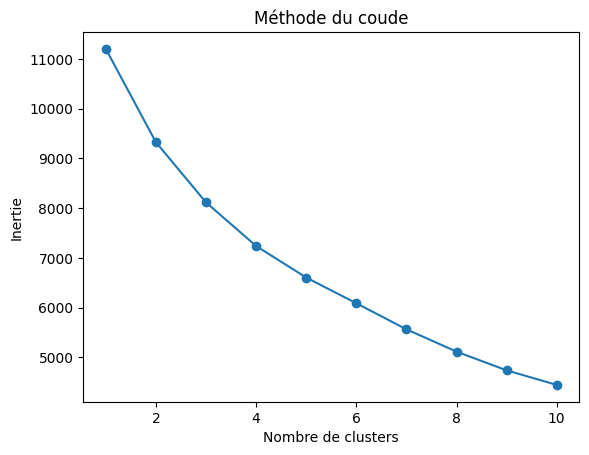

In [191]:
# Détermination du nombre optimal de clusters avec la méthode du coude
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()


In [197]:
# Application de K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_pca)
df['Segment_kmeans'] = labels_kmeans

##**DBSCAN**

In [196]:
# Application de DBSCAN avec les meilleurs paramètres
dbscan = DBSCAN(eps=1.0, min_samples=20)
label_dbscan = dbscan.fit_predict(X_pca)
df['Segment_dbscan'] = label_dbscan

## **GMM**

**Sélection du meilleur nombre de clusters avec silhouette score**

In [195]:
best_n_components = None
best_score = -1

for n in range(2, 11):
    gmm = GaussianMixture(n_components=n, random_state=42)
    labels = gmm.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    if score > best_score:
        best_n_components = n
        best_score_gmm = score

print(f"Meilleur nombre de clusters: {best_n_components}")
print(f"Meilleur score de silhouette: {best_score_gmm}")

Meilleur nombre de clusters: 10
Meilleur score de silhouette: 0.017620331673612016


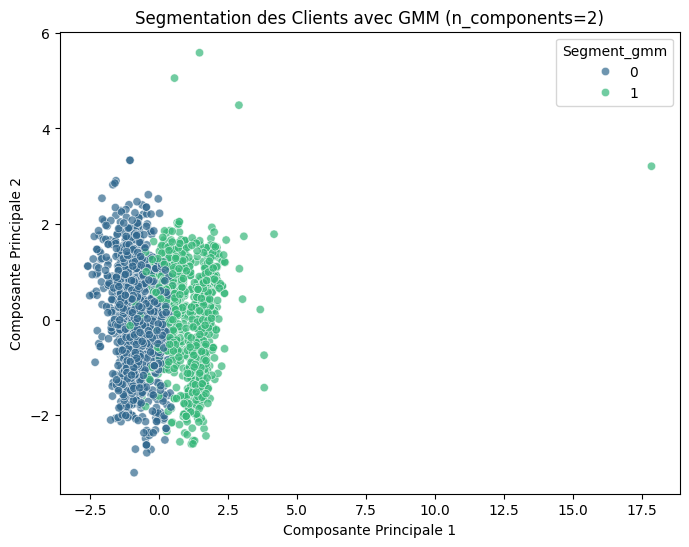

In [184]:
# Application de GMM avec le meilleur nombre de clusters
gmm = GaussianMixture(n_components=best_n_components, random_state=42)
df['Segment_gmm'] = gmm.fit_predict(X_pca)

# **Etape 3 : Évaluation des résultats**

**Visualisation des résultats**

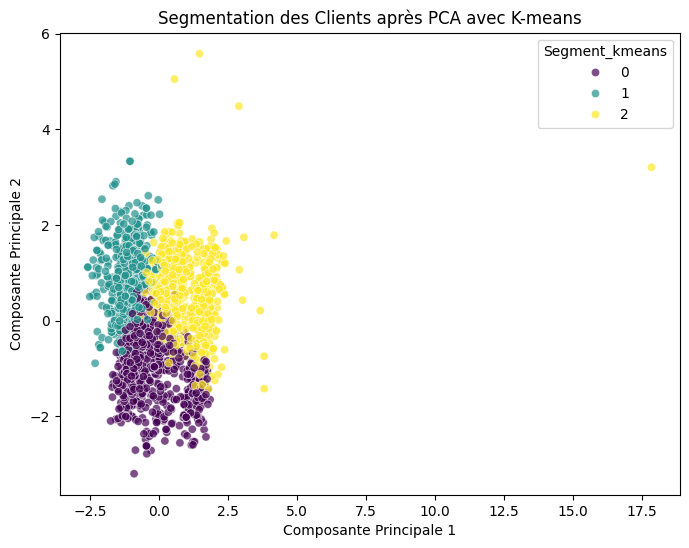

In [186]:
# Visualisation des segments de l'algorithme k-means
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Segment_kmeans'], palette='viridis', alpha=0.7)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Segmentation des Clients après PCA avec K-means')
plt.show()

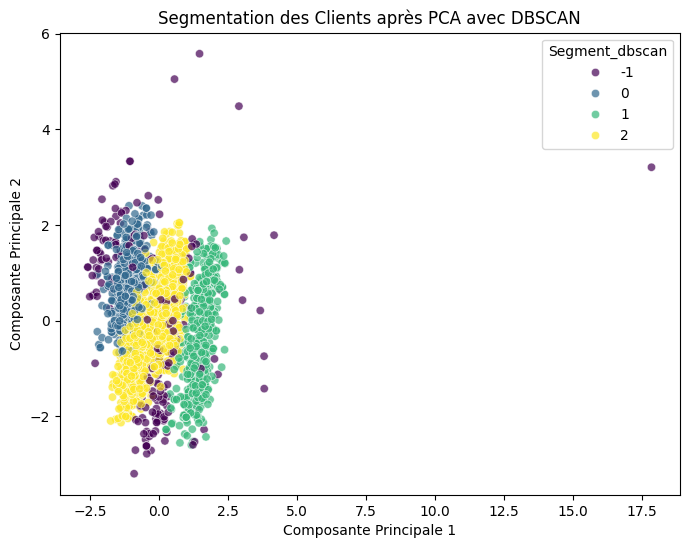

In [187]:
# Visualisation des segments de l'algorithme DBSCAN
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Segment_dbscan'], palette='viridis', alpha=0.7)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title(f'Segmentation des Clients après PCA avec DBSCAN')
plt.show()


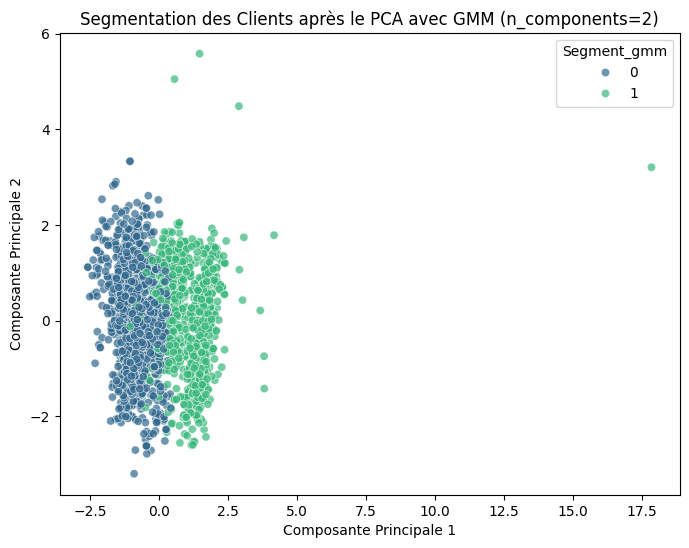

In [188]:
# Visualisation des segments de l'algorithme GMM
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Segment_gmm'], palette='viridis', alpha=0.7)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title(f'Segmentation des Clients après le PCA avec GMM (n_components={best_n_components})')
plt.show()

**Comparaison des métriques**

In [199]:
kmeans_score = silhouette_score(X_pca, labels_kmeans)
dbscan_score = silhouette_score(X_pca, label_dbscan)

# Créer un DataFrame pour afficher les résultats
results = pd.DataFrame({
    'Algorithme': ['KMeans', 'AgglomerativeClustering', 'DBSCAN'],
    'Score de Silhouette': [kmeans_score, best_score_gmm, dbscan_score]
})

In [200]:
results

,Algorithme,Score de Silhouette
0,KMeans,0.178148
1,AgglomerativeClustering,0.017620
2,DBSCAN,0.100885
